The link for the original Assignment4 document om ML_Zoomcamp by Alexey Grigorev of [Data Talks Club](https://datatalks.club/) is [here](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/04-evaluation/homework.md).

The link for the dataset used in the assignment is [here](https://github.com/gastonstat/CreditSco).

## Homework 4

Use this notebook as a starter

In [348]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [349]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-03 14:26:16--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.9’

CreditScoring.csv.9 100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2021-10-03 14:26:16 (1.75 MB/s) - ‘CreditScoring.csv.9’ saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [350]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [351]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [352]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [353]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [354]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [355]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [356]:
print(df.dtypes)

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object


In [357]:
df.nunique()

seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
default         2
dtype: int64

## Your code

What are the categorical variables? What are the numerical?

In [358]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(df.dtypes[df.dtypes != 'object'].index)

categorical, numerical

(['home', 'marital', 'records', 'job'],
 ['seniority',
  'time',
  'age',
  'expenses',
  'income',
  'assets',
  'debt',
  'amount',
  'price',
  'default'])

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
df_temporary_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_temporary_train, test_size=0.25, random_state=1)

In [361]:
df_train.shape, df_val.shape, df_test.shape

((2672, 14), (891, 14), (891, 14))

In [362]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

# Keep those for the first question
# del df_train['default']
#del df_val['default']
#del df_test['default']

In [363]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape, 

((2672, 14), (891, 14), (891, 14), (2672,), (891,), (891,))

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [364]:
from sklearn.metrics import roc_auc_score

In [365]:
importance_dict = {}
for i in numerical:
    if roc_auc_score(y_train, df_train[i].values) < 0.5:
        importance = roc_auc_score(y_train, -df_train[i].values)
        print("AUC for", i, ": ", importance)
        importance_dict[i] = importance
    else:
        importance = roc_auc_score(y_train, df_train[i].values)
        print("AUC for", i, ": ", importance)
        importance_dict[i] = importance

most_important = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[1][0]
print(f"The threshold with the highest accuracy is: {most_important}")

AUC for seniority :  0.7093778624491943
AUC for time :  0.5608662489595051
AUC for age :  0.5732933272499939
AUC for expenses :  0.5009184217217011
AUC for income :  0.682006666132633
AUC for assets :  0.6486042567122802
AUC for debt :  0.5047829675783548
AUC for amount :  0.5910773431595518
AUC for price :  0.5043329862114843
AUC for default :  1.0
The threshold with the highest accuracy is: seniority


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [366]:
selected = ['seniority', 'income', 'assets', 'records', 'job', 'home']

df_train = df_train[selected]
df_val = df_val[selected]
df_test = df_test[selected]

df_train.shape, df_val.shape, df_test.shape


((2672, 6), (891, 6), (891, 6))

In [367]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [368]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [369]:
dv.get_feature_names()

['assets',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'records=no',
 'records=yes',
 'seniority']

In [370]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [371]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
decision = (y_pred >= 0.5)
accuracy = (y_val == decision).mean()

print(f"The accuracy of the decision is {round(accuracy,4)}")

The accuracy of the decision is 0.7778


In [372]:
# Check the treshold alternatives:

from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 11) #A
results = {}
for t in thresholds: #B 
    dec = y_pred >= t #C 
    acc = accuracy_score(y_val, dec) #C 
    results[t] = acc
    print(f"The accuracy for treshold={round(t,2)} is: {round(acc, 4)}")

best = sorted(results.items(), key=lambda x: x[1], reverse=True)[0][0]
print(f"The threshold with the highest accuracy is: {best}")



The accuracy for treshold=0.0 is: 0.2761
The accuracy for treshold=0.1 is: 0.4882
The accuracy for treshold=0.2 is: 0.6543
The accuracy for treshold=0.3 is: 0.7407
The accuracy for treshold=0.4 is: 0.7688
The accuracy for treshold=0.5 is: 0.7778
The accuracy for treshold=0.6 is: 0.7688
The accuracy for treshold=0.7 is: 0.7553
The accuracy for treshold=0.8 is: 0.7419
The accuracy for treshold=0.9 is: 0.7284
The accuracy for treshold=1.0 is: 0.7239
The threshold with the highest accuracy is: 0.5


## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [373]:
from sklearn.metrics import roc_auc_score

In [374]:
round(roc_auc_score(y_val, y_pred), 3)

0.811

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [398]:
scores = []

thresholds = np.linspace(0.0, 1.0, 101)

intersection = 0

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    scores.append((t, p, r))


/tmp/ipykernel_15231/327697134.py:19: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


Text(0, 0.5, 'Values')

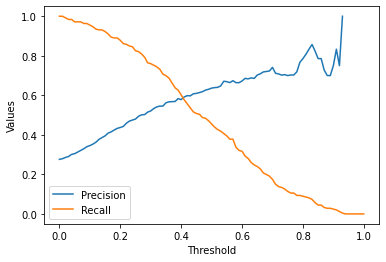

In [376]:
columns = ['threshold', 'Precision', 'Recall']
df_scores = pd.DataFrame(scores, columns=columns)

plt.plot(df_scores.threshold, df_scores['Precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['Recall'], label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Values')

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [377]:
f1_scores = []

thresholds = np.linspace(0.0, 1.0, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * (p * r) / (p + r)   
    f1_scores.append((t, f1))

/tmp/ipykernel_15231/1561722048.py:17: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


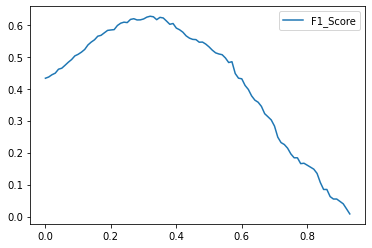

In [378]:
columns = ['threshold', 'F1_Score']
df_f1_scores = pd.DataFrame(f1_scores, columns=columns)

plt.plot(df_f1_scores.threshold, df_f1_scores.F1_Score, label='F1_Score')
plt.legend()

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [379]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[selected].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear',C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [380]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [381]:
from sklearn.model_selection import KFold

from tqdm.auto import tqdm

In [382]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [401]:
kfold_scores = []

for train_idx, val_idx in kfold.split(df_temporary_train):
    df_train = df_temporary_train.iloc[train_idx]
    df_val = df_temporary_train.iloc[val_idx]

    y_train =df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    print("{:.5f}".format(auc))
    kfold_scores.append(auc)

print(f'{np.mean(scores):.4f} +- {np.std(scores):.4f}')

0.82562
0.82541
0.78934
0.82501
0.80547
nan +- nan


In [399]:
round(np.std(scores),3)

nan

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [385]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_temporary_train):
        df_train = df_temporary_train.iloc[train_idx]
        df_val = df_temporary_train.iloc[val_idx]

        y_train =df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|██▌       | 1/4 [00:00<00:01,  2.11it/s]

C=0.01 0.809 +- 0.013


 50%|█████     | 2/4 [00:00<00:00,  2.04it/s]

C=0.1 0.813 +- 0.014


 75%|███████▌  | 3/4 [00:01<00:00,  1.97it/s]

C=1 0.814 +- 0.015


100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

C=10 0.812 +- 0.014


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.